## Import Part:

### **0. Project Setup and Imports**

This initial section focuses on setting up the Python environment for our Bitcoin price forecasting project. We will import essential libraries for data manipulation (Pandas, NumPy), data visualization (Matplotlib, Seaborn), data preprocessing (Scikit-learn), and building neural network models (TensorFlow/Keras). Additionally, we'll configure global settings like plot styles and random seeds to ensure consistency and reproducibility of our results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('seaborn-v0_8-darkgrid')
tf.random.set_seed(42)
np.random.seed(42)

## 1. Dataset Loading

### **1. Dataset Loading and Initial Inspection**

The first step in our analysis is to load the historical Bitcoin OHLCV (Open, High, Low, Close, Volume) data from the `BTC-USD.csv` file. This section details the loading process and an initial examination of the dataset's structure, including displaying the first few rows, checking data types, and obtaining a basic statistical summary. We will also define and explain each feature present in the dataset to understand the information we'll be working with.

We'll start by loading the historical Bitcoin data.

**Dataset:** `BTC-USD.csv`**Source:** Contains daily Bitcoin prices with columns: Open, High, Low, Close, Volume, Adj Close, and Date.

In [ ]:
try:
    df_btc = pd.read_csv('BTC-USD.csv')
except FileNotFoundError:
    print("Error: 'BTC-USD.csv' not found. Please ensure the file is in the correct directory.")
    exit()

print("First 5 rows of the dataset:")
print(df_btc.head())
print("\n" + "="*50 + "\n")

print("Dataset information:")
df_btc.info()
print("\n" + "="*50 + "\n")

print("Statistical summary of the dataset (initial):")
print(df_btc.describe())
print("\n" + "="*50 + "\n")

First 5 rows of the dataset:
   Unnamed: 0        Date        Open        High         Low       Close  \
0           0  2014-09-17  465.864014  468.174011  452.421997  457.334015   
1           1  2014-09-18  456.859985  456.859985  413.104004  424.440002   
2           2  2014-09-19  424.102997  427.834991  384.532013  394.795990   
3           3  2014-09-20  394.673004  423.295990  389.882996  408.903992   
4           4  2014-09-21  408.084991  412.425995  393.181000  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3222 non-null   int64  
 1   Date        3222 non-null   object 
 2   Open        3222 non-null   float64
 3   High        3222 non-null   float64
 4   Low         3222 non-null   float64
 5   Clo

In [ ]:
print("First 5 rows of the dataset:")
print(df_btc.head())
print("\n" + "="*50 + "\n")



First 5 rows of the dataset:
   Unnamed: 0        Date        Open        High         Low       Close  \
0           0  2014-09-17  465.864014  468.174011  452.421997  457.334015   
1           1  2014-09-18  456.859985  456.859985  413.104004  424.440002   
2           2  2014-09-19  424.102997  427.834991  384.532013  394.795990   
3           3  2014-09-20  394.673004  423.295990  389.882996  408.903992   
4           4  2014-09-21  408.084991  412.425995  393.181000  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  




In [ ]:
print(df_btc.columns)


Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
import pandas as pd

if 'Date' in df_btc.columns:
    df_btc['Date'] = pd.to_datetime(df_btc['Date'])
    df_btc.set_index('Date', inplace=True)
else:
    print("Error: 'Date' column not found. Please check data loading.")


print("\nColumns available in df_btc before checking 'Adj Close':")
print(df_btc.columns)
print("="*50)

if 'Adj Close' in df_btc.columns and 'Close' in df_btc.columns:
    adj_close_equals_close = (df_btc['Adj Close'] == df_btc['Close']).all()
    print(f"Is 'Adj Close' always equal to 'Close'? {adj_close_equals_close}")

    if adj_close_equals_close:
        print("Dropping 'Adj Close' as it is identical to 'Close'.")
        df_btc.drop('Adj Close', axis=1, inplace=True)
    else:
        print("'Adj Close' differs from 'Close' in some instances. We will proceed with 'Close'.")
else:
    print("\nSkipping 'Adj Close' comparison: 'Adj Close' or 'Close' column(s) not found.")
    if 'Adj Close' not in df_btc.columns:
        print("Reason: 'Adj Close' column is missing.")
    if 'Close' not in df_btc.columns:
        print("Reason: 'Close' column is missing.")


print("\nDataset after handling 'Adj Close' and setting index:")
print(df_btc.head())
print("\n" + "="*50 + "\n")

Error: 'Date' column not found. Please check data loading.

Columns available in df_btc before checking 'Adj Close':
Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Skipping 'Adj Close' comparison: 'Adj Close' or 'Close' column(s) not found.
Reason: 'Adj Close' column is missing.

Dataset after handling 'Adj Close' and setting index:
            Unnamed: 0        Open        High         Low       Close  \
Date                                                                     
2014-09-17           0  465.864014  468.174011  452.421997  457.334015   
2014-09-18           1  456.859985  456.859985  413.104004  424.440002   
2014-09-19           2  424.102997  427.834991  384.532013  394.795990   
2014-09-20           3  394.673004  423.295990  389.882996  408.903992   
2014-09-21           4  408.084991  412.425995  393.181000  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700

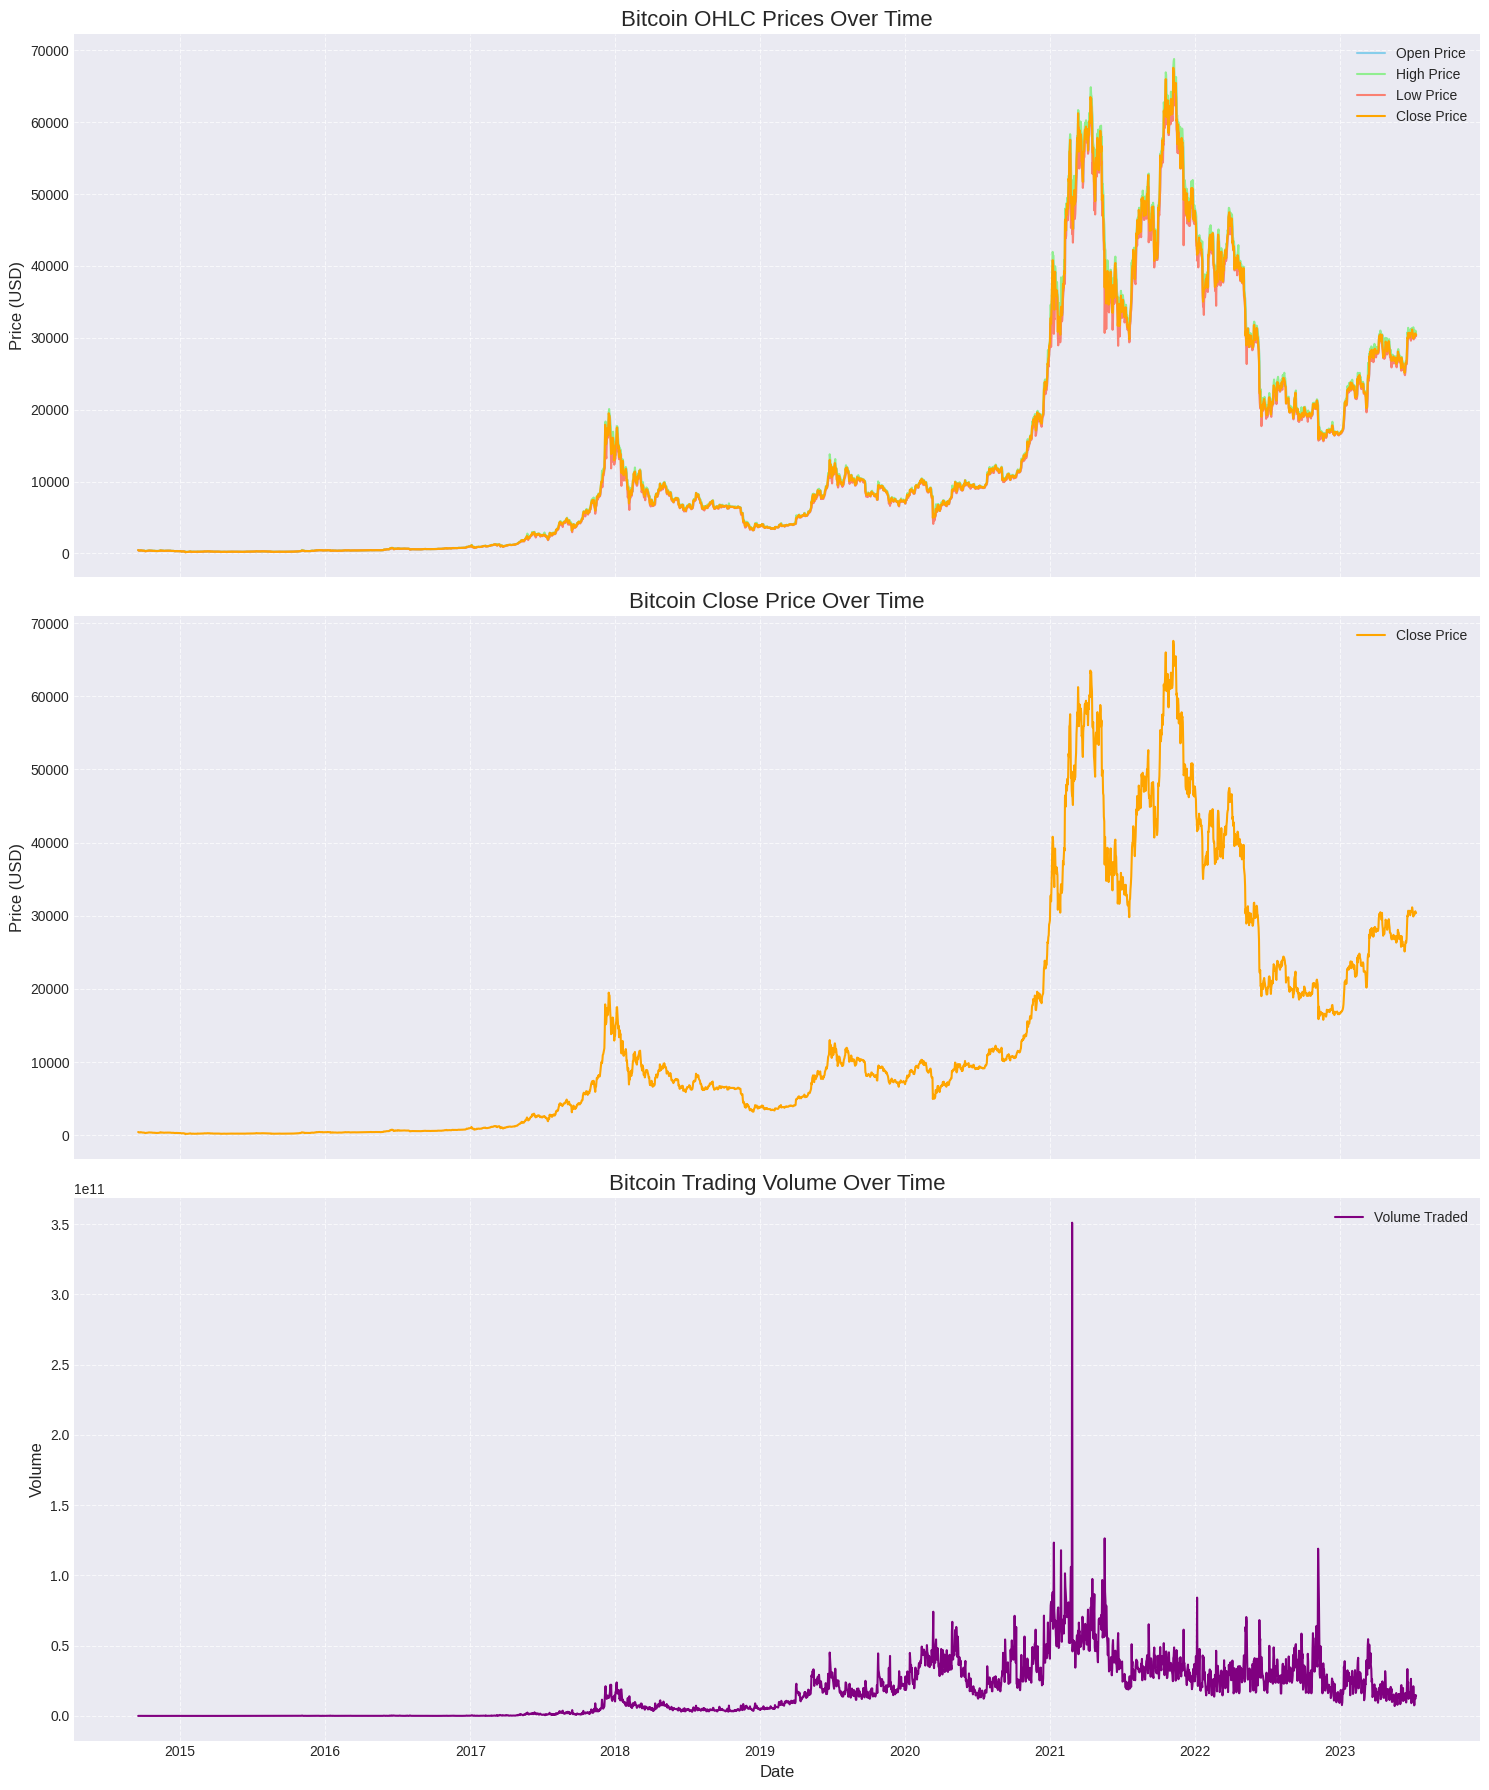

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18), sharex=True)

axes[0].plot(df_btc['Open'], label='Open Price', color='skyblue')
axes[0].plot(df_btc['High'], label='High Price', color='lightgreen')
axes[0].plot(df_btc['Low'], label='Low Price', color='salmon')
axes[0].plot(df_btc['Close'], label='Close Price', color='orange')
axes[0].set_title('Bitcoin OHLC Prices Over Time', fontsize=16)
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.7)

axes[1].plot(df_btc['Close'], label='Close Price', color='orange')
axes[1].set_title('Bitcoin Close Price Over Time', fontsize=16)
axes[1].set_ylabel('Price (USD)', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.7)

axes[2].plot(df_btc['Volume'], label='Volume Traded', color='purple')
axes[2].set_title('Bitcoin Trading Volume Over Time', fontsize=16)
axes[2].set_ylabel('Volume', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].legend(fontsize=10)
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Correlation Matrix:
            Open      High       Low     Close    Volume
Open    1.000000  0.999502  0.999102  0.998791  0.704183
High    0.999502  1.000000  0.998987  0.999460  0.708575
Low     0.999102  0.998987  1.000000  0.999365  0.695505
Close   0.998791  0.999460  0.999365  1.000000  0.702862
Volume  0.704183  0.708575  0.695505  0.702862  1.000000




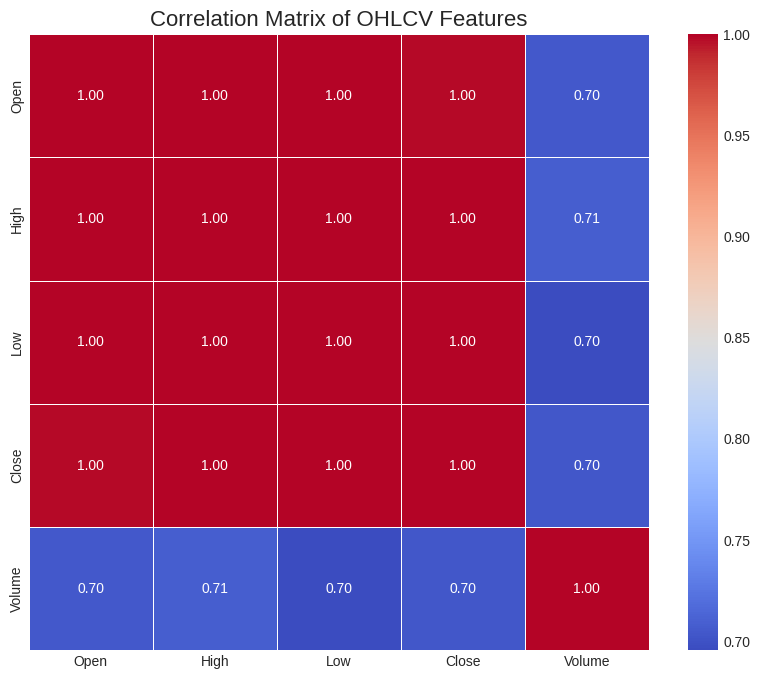

In [ ]:
correlation_matrix = df_btc[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

print("Correlation Matrix:")
print(correlation_matrix)
print("\n" + "="*50 + "\n")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of OHLCV Features', fontsize=16)
plt.show()

Statistical Summary of OHLCV Features:
               Open          High           Low         Close        Volume
count   3222.000000   3222.000000   3222.000000   3222.000000  3.222000e+03
mean   13633.555524  13966.498897  13269.790975  13641.491658  1.657062e+10
std    16016.593310  16417.423832  15559.562019  16014.439000  1.950701e+10
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06
25%      757.838730    772.024277    745.732499    759.970260  1.300485e+08
50%     7664.044434   7867.845215   7499.634766   7679.053711  1.017502e+10
75%    20210.792481  20660.277832  19811.524414  20238.632813  2.746342e+10
max    67549.734375  68789.625000  66382.062500  67566.828125  3.509679e+11




<Figure size 1500x800 with 0 Axes>

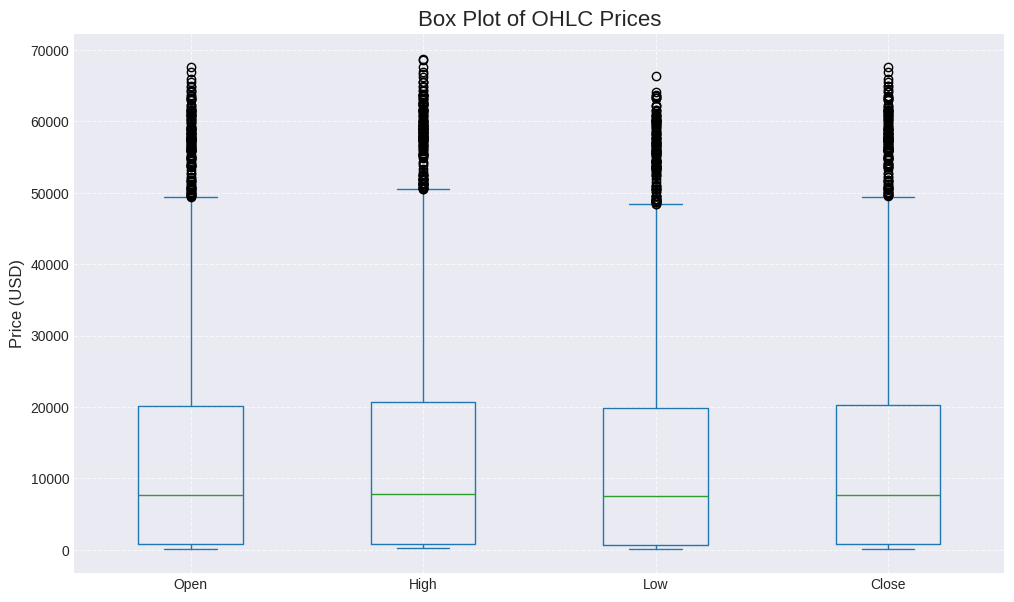

<Figure size 800x600 with 0 Axes>

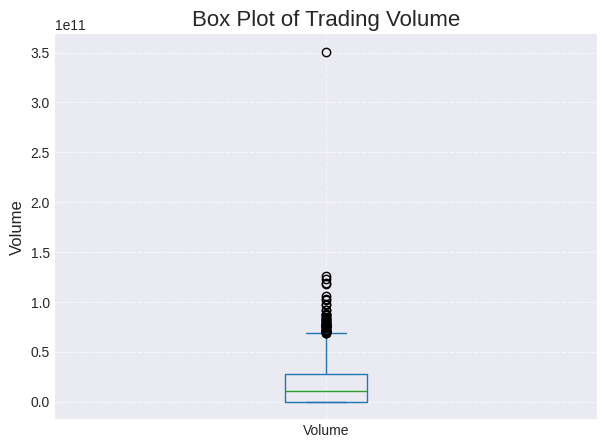

In [ ]:
print("Statistical Summary of OHLCV Features:")
print(df_btc[['Open', 'High', 'Low', 'Close', 'Volume']].describe())
print("\n" + "="*50 + "\n")

plt.figure(figsize=(15, 8))
df_btc[['Open', 'High', 'Low', 'Close']].plot(kind='box', figsize=(12,7))
plt.title('Box Plot of OHLC Prices', fontsize=16)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
df_btc[['Volume']].plot(kind='box', figsize=(7,5))
plt.title('Box Plot of Trading Volume', fontsize=16)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("Missing values before handling:")
print(df_btc.isnull().sum())
print("\n" + "="*50 + "\n")

df_btc.ffill(inplace=True)
df_btc.bfill(inplace=True)


print("Missing values after handling:")
print(df_btc.isnull().sum())
print("\n" + "="*50 + "\n")

for col in df_btc.columns:
    if not pd.api.types.is_numeric_dtype(df_btc[col]):
        print(f"Column {col} is not numeric. Attempting conversion.")
        try:
            df_btc[col] = pd.to_numeric(df_btc[col])
        except ValueError as e:
            print(f"Could not convert column {col}: {e}")



Missing values before handling:
Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64


Missing values after handling:
Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64




In [ ]:
df_btc['Target'] = df_btc['Close'].shift(-1)

df_btc.dropna(subset=['Target'], inplace=True)

print("Dataset with 'Target' feature (last 5 rows):")
print(df_btc.tail())
print("\n" + "="*50 + "\n")

feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
target_column = 'Target'

df_model_data = df_btc[feature_columns + [target_column]].copy()

Dataset with 'Target' feature (last 5 rows):
            Unnamed: 0          Open          High           Low  \
Date                                                               
2023-07-08        3216  30346.921875  30374.437500  30080.160156   
2023-07-09        3217  30291.611328  30427.589844  30085.591797   
2023-07-10        3218  30172.423828  31026.083984  29985.394531   
2023-07-11        3219  30417.632813  30788.314453  30358.097656   
2023-07-12        3220  30622.246094  30959.964844  30228.835938   

                   Close       Volume        Target  
Date                                                 
2023-07-08  30292.541016   7509378699  30171.234375  
2023-07-09  30171.234375   7903327692  30414.470703  
2023-07-10  30414.470703  14828209155  30620.951172  
2023-07-11  30620.951172  12151839152  30391.646484  
2023-07-12  30391.646484  14805659717  30383.390625  




In [ ]:
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_features = feature_scaler.fit_transform(df_model_data[feature_columns])

scaled_target = target_scaler.fit_transform(df_model_data[[target_column]])

df_scaled_features = pd.DataFrame(scaled_features, columns=feature_columns, index=df_model_data.index)
df_scaled_target = pd.DataFrame(scaled_target, columns=[target_column], index=df_model_data.index)

print("Scaled features (first 5 rows):")
print(df_scaled_features.head())
print("\nScaled target (first 5 rows):")
print(df_scaled_target.head())
print("\n" + "="*50 + "\n")

Scaled features (first 5 rows):
                Open      High       Low     Close    Volume
Date                                                        
2014-09-17  0.004289  0.003739  0.004243  0.004144  0.000043
2014-09-18  0.004155  0.003574  0.003649  0.003655  0.000081
2014-09-19  0.003669  0.003151  0.003217  0.003216  0.000091
2014-09-20  0.003232  0.003085  0.003298  0.003425  0.000088
2014-09-21  0.003431  0.002927  0.003348  0.003275  0.000059

Scaled target (first 5 rows):
              Target
Date                
2014-09-17  0.003655
2014-09-18  0.003216
2014-09-19  0.003425
2014-09-20  0.003275
2014-09-21  0.003325




### Justification for Normalization:

- RNNs, like many neural networks, are sensitive to the scale of input data.
- MinMaxScaler scales data to a fixed range [0, 1]. This prevents features with larger magnitudes from dominating the learning process and helps gradients flow more effectively, leading to faster convergence and potentially better model performance.
- It's crucial to fit the scaler only on the training data and then use it to transform the training, validation, and test sets to prevent data leakage from the validation/test sets into the training process. (This will be more explicit in the splitting section).


## Sequence Creation
Transform the time series data into a supervised learning format: sequences of historical values (X) and the corresponding target (y).



In [ ]:
def create_sequences(features, target, lookback):
    X, y = [], []
    for i in range(len(features) - lookback):
        X.append(features[i:(i + lookback)])
        y.append(target[i + lookback])
    return np.array(X), np.array(y)

In [ ]:
features_np = df_scaled_features.values
target_np = df_scaled_target.values

train_size_ratio = 0.70
val_size_ratio = 0.15

total_samples = len(features_np)
train_split_idx = int(total_samples * train_size_ratio)
val_split_idx = int(total_samples * (train_size_ratio + val_size_ratio))

train_features = features_np[:train_split_idx]
val_features = features_np[train_split_idx:val_split_idx]
test_features = features_np[val_split_idx:]

train_target = target_np[:train_split_idx]
val_target = target_np[train_split_idx:val_split_idx]
test_target = target_np[val_split_idx:]


print("Revisiting scaling with proper train/val/test split consideration...")

df_train = df_model_data.iloc[:train_split_idx]
df_val = df_model_data.iloc[train_split_idx:val_split_idx]
df_test = df_model_data.iloc[val_split_idx:]

feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train_features = feature_scaler.fit_transform(df_train[feature_columns])
scaled_val_features = feature_scaler.transform(df_val[feature_columns])
scaled_test_features = feature_scaler.transform(df_test[feature_columns])

scaled_train_target = target_scaler.fit_transform(df_train[[target_column]])
scaled_val_target = target_scaler.transform(df_val[[target_column]])
scaled_test_target = target_scaler.transform(df_test[[target_column]])


print(f"Shape of scaled_train_features: {scaled_train_features.shape}")
print(f"Shape of scaled_val_features: {scaled_val_features.shape}")
print(f"Shape of scaled_test_features: {scaled_test_features.shape}")
print(f"Shape of scaled_train_target: {scaled_train_target.shape}")
print(f"Shape of scaled_val_target: {scaled_val_target.shape}")
print(f"Shape of scaled_test_target: {scaled_test_target.shape}")
print("\n" + "="*50 + "\n")

original_test_target = df_test[target_column].values.reshape(-1,1)
original_train_target_for_plotting = df_train[target_column].values.reshape(-1,1)
original_test_target = df_test[target_column].values.reshape(-1,1)
original_train_target_for_plotting = df_train[target_column].values.reshape(-1,1)

train_dates = df_train.index
val_dates = df_val.index
test_dates = df_test.index
initial_lookback = 60
X_sequences, y_sequences = create_sequences(scaled_features, target_series.values, initial_lookback)

print(f"\n--- Sequence Creation (Lookback={initial_lookback}) ---")
print(f"Shape of X_sequences: {X_sequences.shape}")
print(f"Shape of y_sequences: {y_sequences.shape}")
print(f"Example X_sequence[0]:\n{X_sequences[0][:3]}")
print(f"Example y_sequence[0]: {y_sequences[0]}")

Revisiting scaling with proper train/val/test split consideration...
Shape of scaled_train_features: (2254, 5)
Shape of scaled_val_features: (483, 5)
Shape of scaled_test_features: (484, 5)
Shape of scaled_train_target: (2254, 1)
Shape of scaled_val_target: (483, 1)
Shape of scaled_test_target: (484, 1)



--- Sequence Creation (Lookback=60) ---
Shape of X_sequences: (3161, 60, 5)
Shape of y_sequences: (3161,)
Example X_sequence[0]:
[[4.28907290e-03 3.73944128e-03 4.24270741e-03 4.14358659e-03
  4.31449241e-05]
 [4.15542811e-03 3.57446063e-03 3.64887469e-03 3.65546320e-03
  8.14009147e-05]
 [3.66922344e-03 3.15121937e-03 3.21734240e-03 3.21556748e-03
  9.11925723e-05]]
Example y_sequence[0]: -0.12220185866892419


In [ ]:
def create_rnn_model(lookback, num_features, rnn_units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(SimpleRNN(units=rnn_units, return_sequences=True,
                        input_shape=(lookback, num_features)))
    model.add(Dropout(dropout_rate))

    model.add(SimpleRNN(units=rnn_units, return_sequences=False))
    model.add(Dropout(dropout_rate))


    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

num_features = len(feature_columns)


===== Training and Evaluating RNN for Lookback Period: 30 days =====

Shapes for lookback 30:
X_train: (2224, 30, 5), y_train: (2224,)
X_val: (453, 30, 5), y_val: (453,)
X_test: (454, 30, 5), y_test: (454,)
y_test_original_for_eval shape: (454, 1)

RNN Model Summary (lookback=30):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 30, 50)         │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,151 (35.75 KB)

 Trainable params: 9,151 (35.75 KB)

 Non-trainable params: 0 (0.00 B)


Training RNN model for lookback 30...
Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0524 - val_loss: 2.3208
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - val_loss: 2.1333
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - val_loss: 2.0204
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 1.9650
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - val_loss: 1.8942
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - val_loss: 1.9676
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - val_loss: 1.9942
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - val_loss: 1.8309
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - val_loss: 1.7134
Epoch 10/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 1.8294
Epoch 11/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 1.8072
Epoch 12/50
70/70 ━━━━━━━━━━━━━━━━

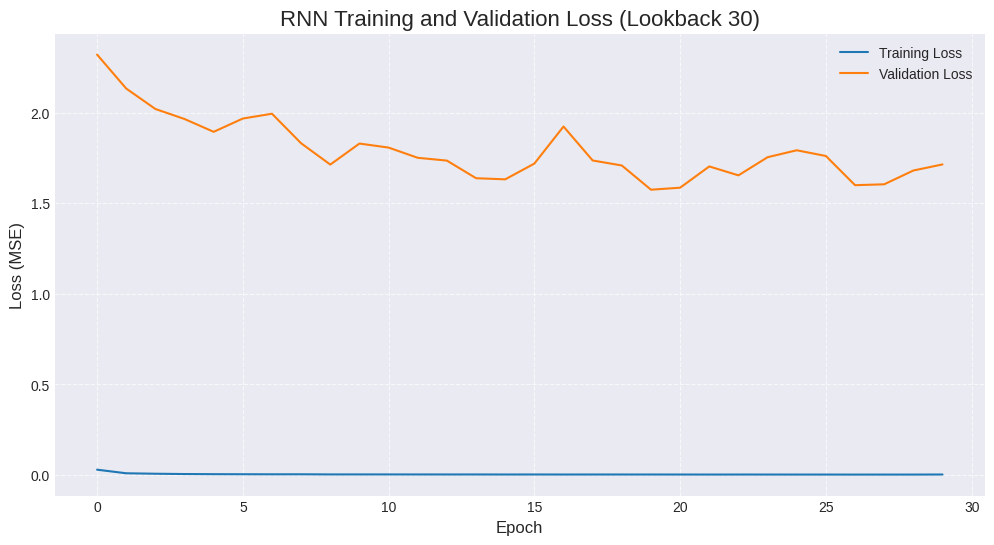


Evaluating RNN model on Test Set (lookback 30)...
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Test Set Metrics for RNN (Lookback 30):
  Mean Squared Error (MSE):      42830022.8593
  Root Mean Squared Error (RMSE):6544.4651
  Mean Absolute Error (MAE):     5529.3949
  Mean Absolute Percentage Error (MAPE): 21.16%
  Cumulative Error (CE):         2506895.1719


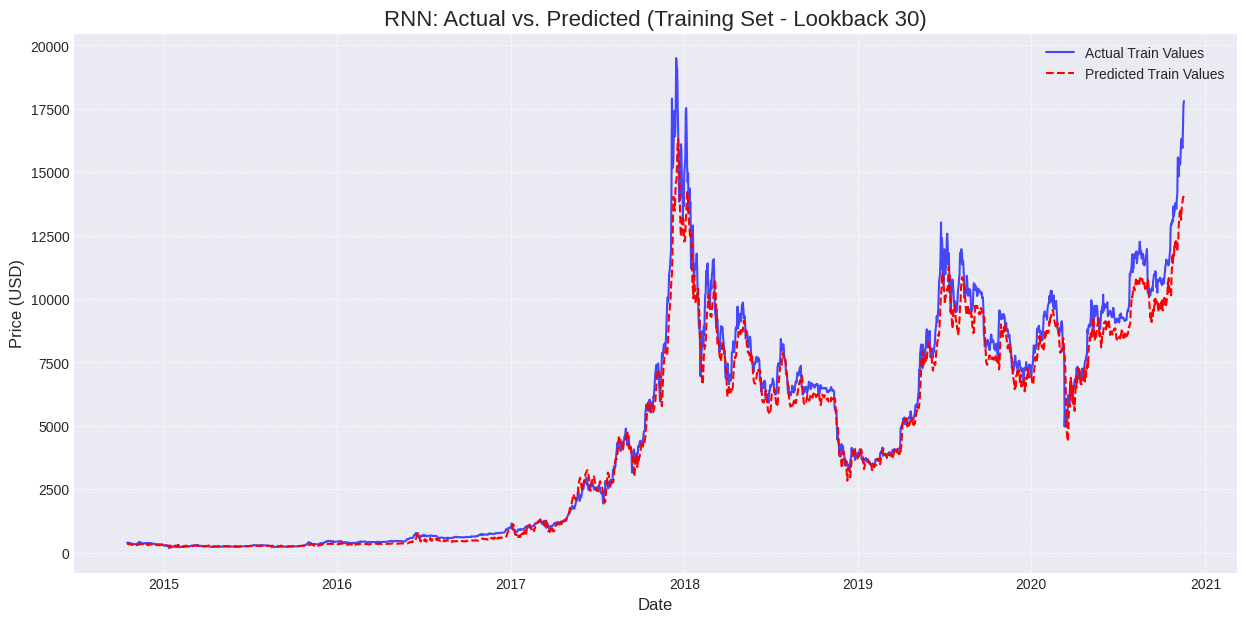

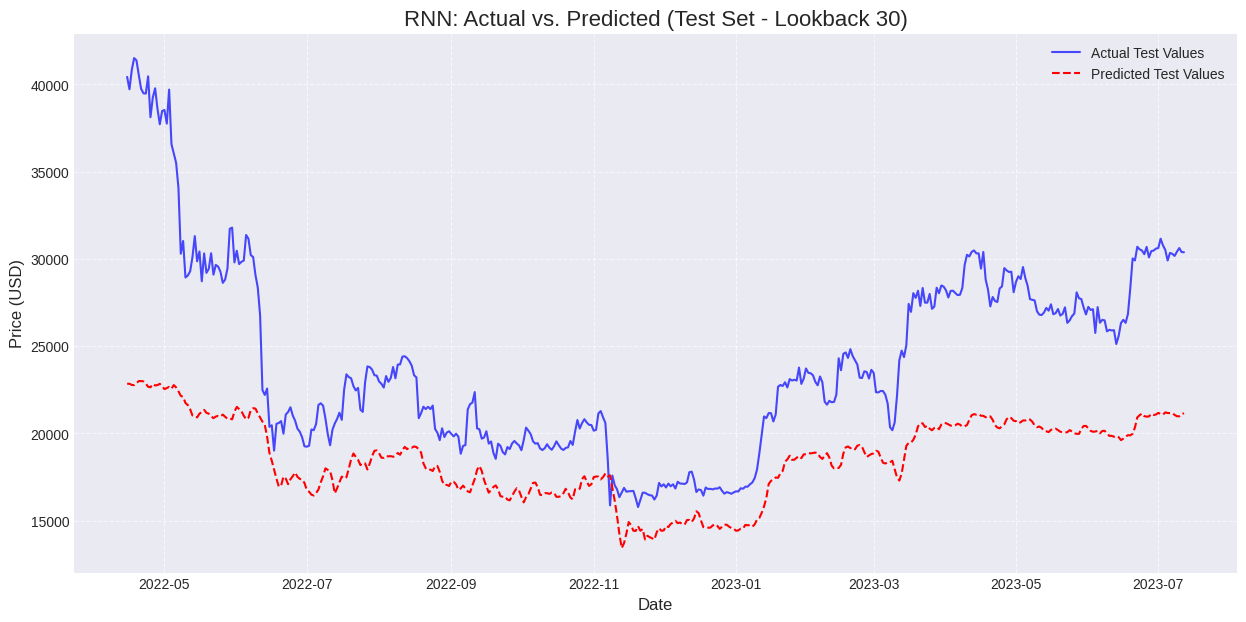

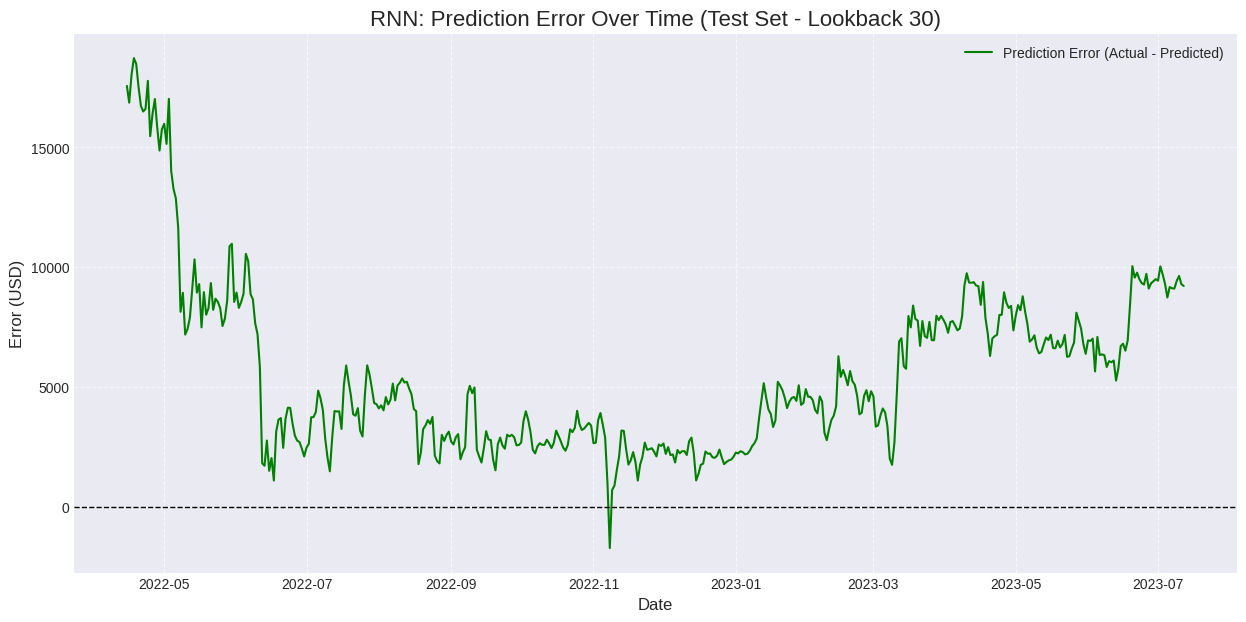


===== Training and Evaluating RNN for Lookback Period: 60 days =====

Shapes for lookback 60:
X_train: (2194, 60, 5), y_train: (2194,)
X_val: (423, 60, 5), y_val: (423,)
X_test: (424, 60, 5), y_test: (424,)
y_test_original_for_eval shape: (424, 1)

RNN Model Summary (lookback=60):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,151 (35.75 KB)

 Trainable params: 9,151 (35.75 KB)

 Non-trainable params: 0 (0.00 B)


Training RNN model for lookback 60...
Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0645 - val_loss: 3.8761
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0086 - val_loss: 3.3575
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056 - val_loss: 3.0994
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0052 - val_loss: 2.7894
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - val_loss: 2.5807
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0035 - val_loss: 2.4619
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031 - val_loss: 2.3621
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - val_loss: 2.3783
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0027 - val_loss: 2.3787
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - val_loss: 2.3556
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 2.2164
Epoch 12/50
69/69 ━━━━━━

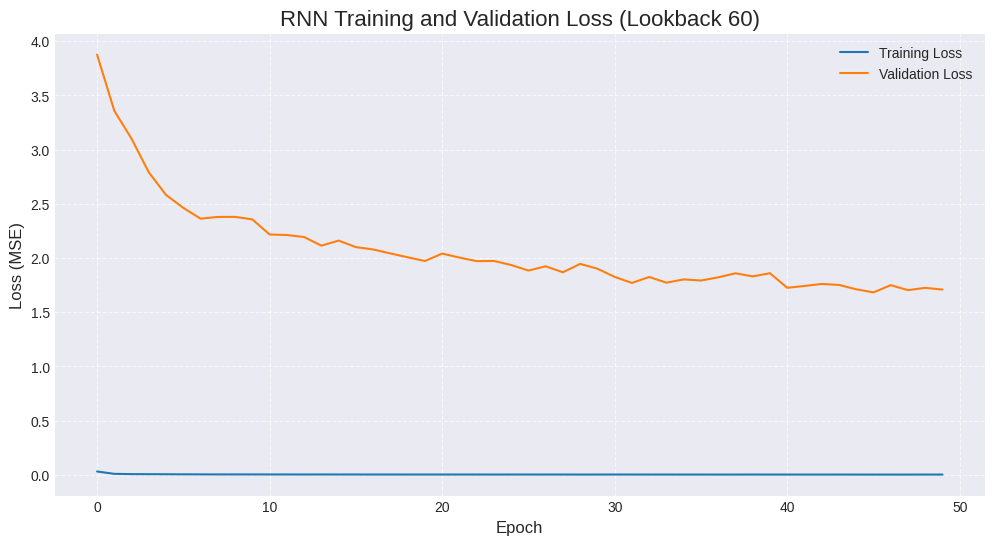


Evaluating RNN model on Test Set (lookback 60)...
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Test Set Metrics for RNN (Lookback 60):
  Mean Squared Error (MSE):      24631186.9868
  Root Mean Squared Error (RMSE):4962.9817
  Mean Absolute Error (MAE):     4151.9297
  Mean Absolute Percentage Error (MAPE): 16.37%
  Cumulative Error (CE):         1754786.0498


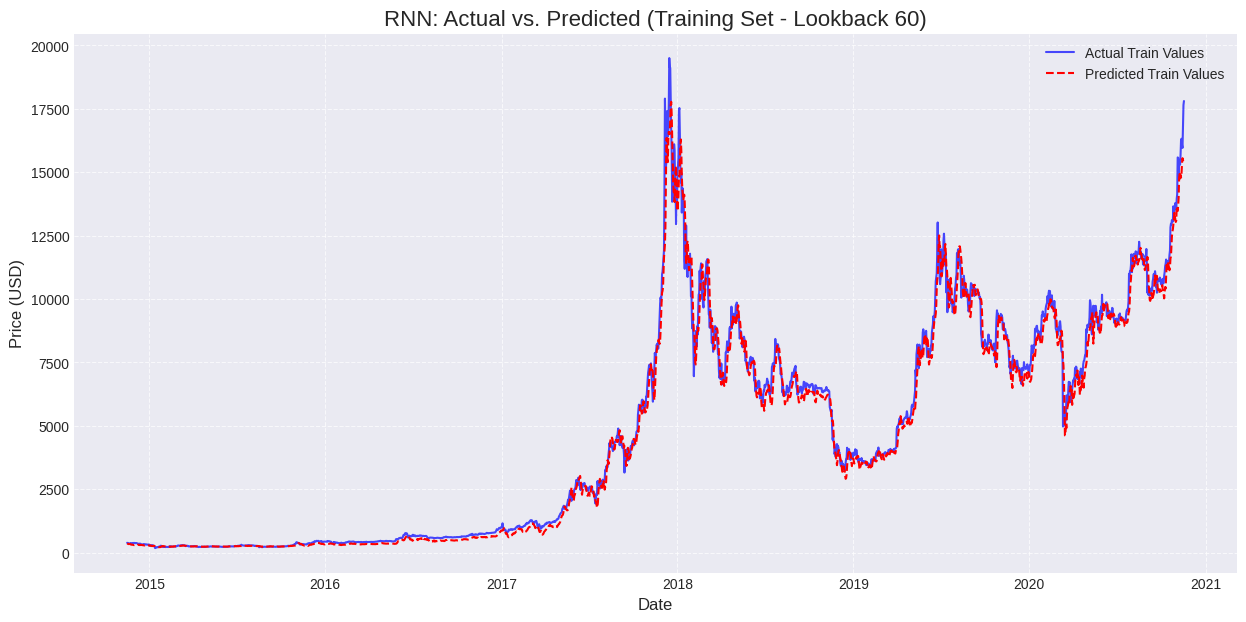

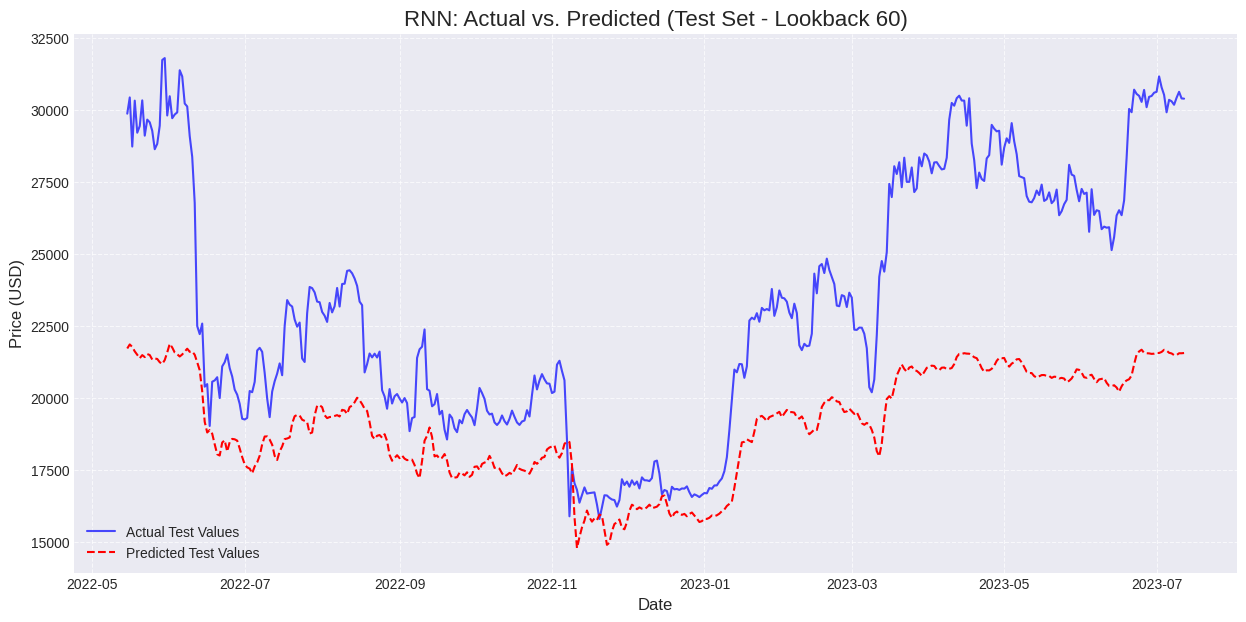

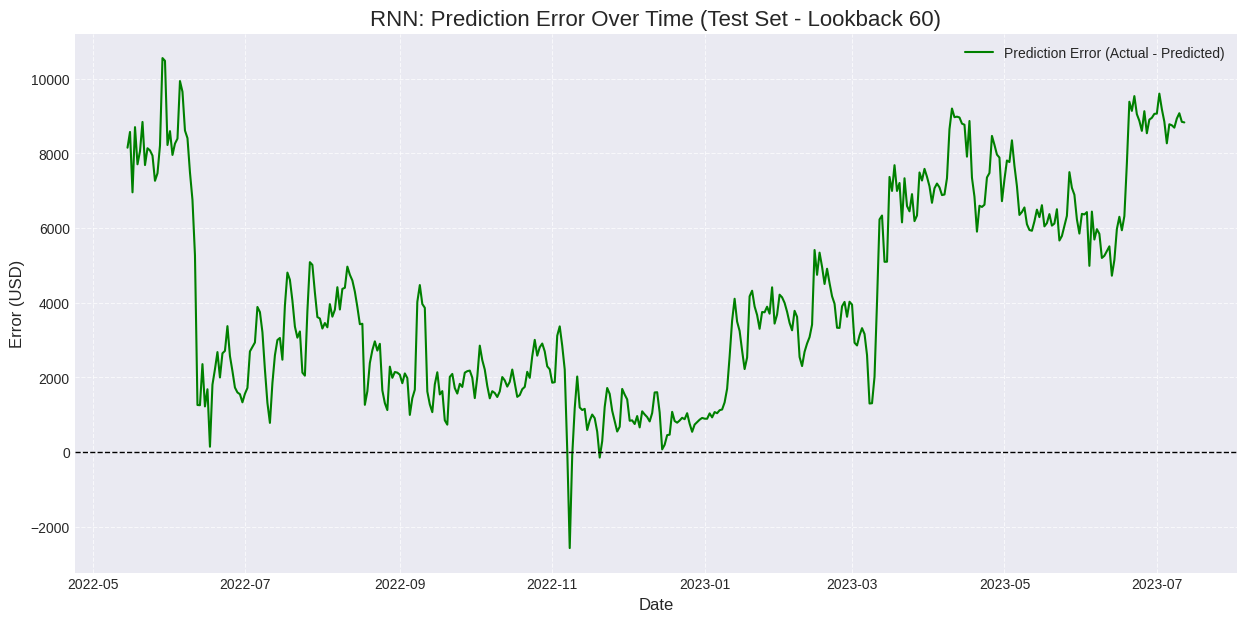


===== Training and Evaluating RNN for Lookback Period: 90 days =====

Shapes for lookback 90:
X_train: (2164, 90, 5), y_train: (2164,)
X_val: (393, 90, 5), y_val: (393,)
X_test: (394, 90, 5), y_test: (394,)
y_test_original_for_eval shape: (394, 1)

RNN Model Summary (lookback=90):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 90, 50)         │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,151 (35.75 KB)

 Trainable params: 9,151 (35.75 KB)

 Non-trainable params: 0 (0.00 B)


Training RNN model for lookback 90...
Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0365 - val_loss: 2.2280
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0071 - val_loss: 2.1642
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - val_loss: 1.8609
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - val_loss: 1.8647
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0028 - val_loss: 1.6441
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - val_loss: 1.6237
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025 - val_loss: 1.6907
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022 - val_loss: 1.7995
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025 - val_loss: 1.6802
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021 - val_loss: 1.7962
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020 - val_loss: 1.9702
Epoch 12/50
68/68 ━━━━━━

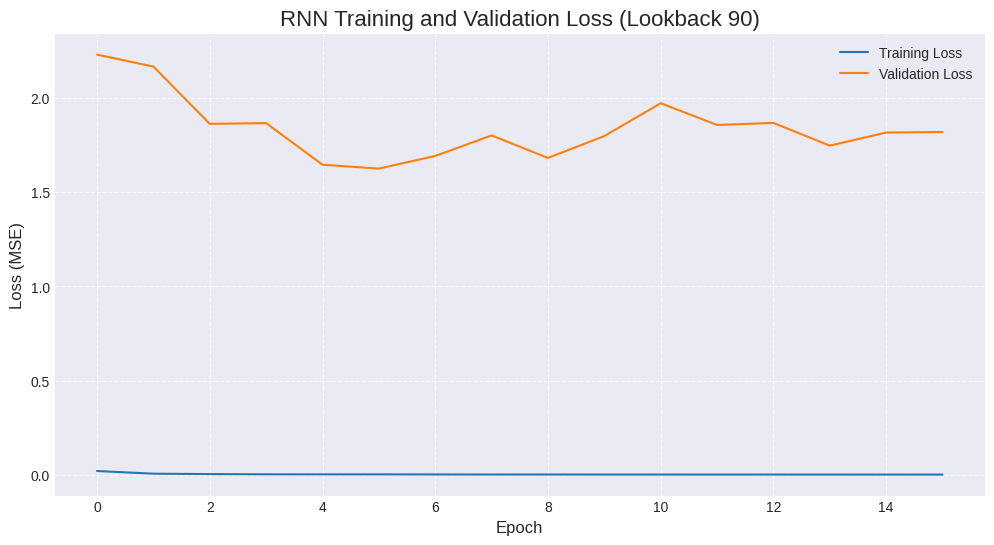


Evaluating RNN model on Test Set (lookback 90)...
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Test Set Metrics for RNN (Lookback 90):
  Mean Squared Error (MSE):      16563544.5164
  Root Mean Squared Error (RMSE):4069.8335
  Mean Absolute Error (MAE):     3482.3308
  Mean Absolute Percentage Error (MAPE): 14.27%
  Cumulative Error (CE):         1365901.7559


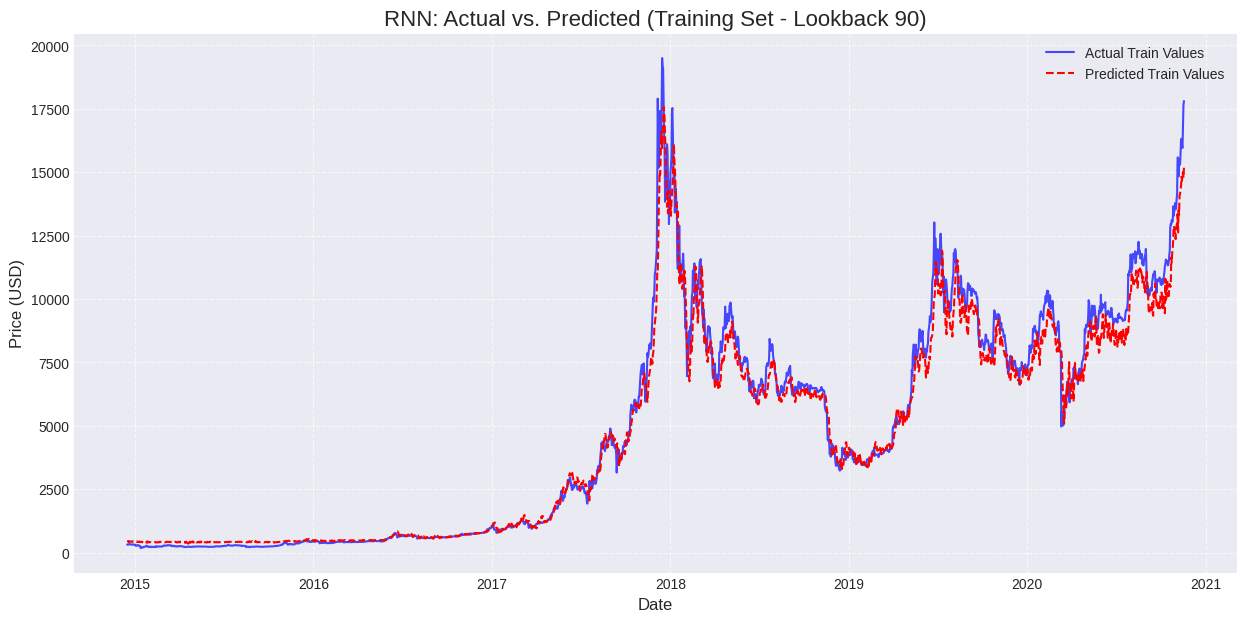

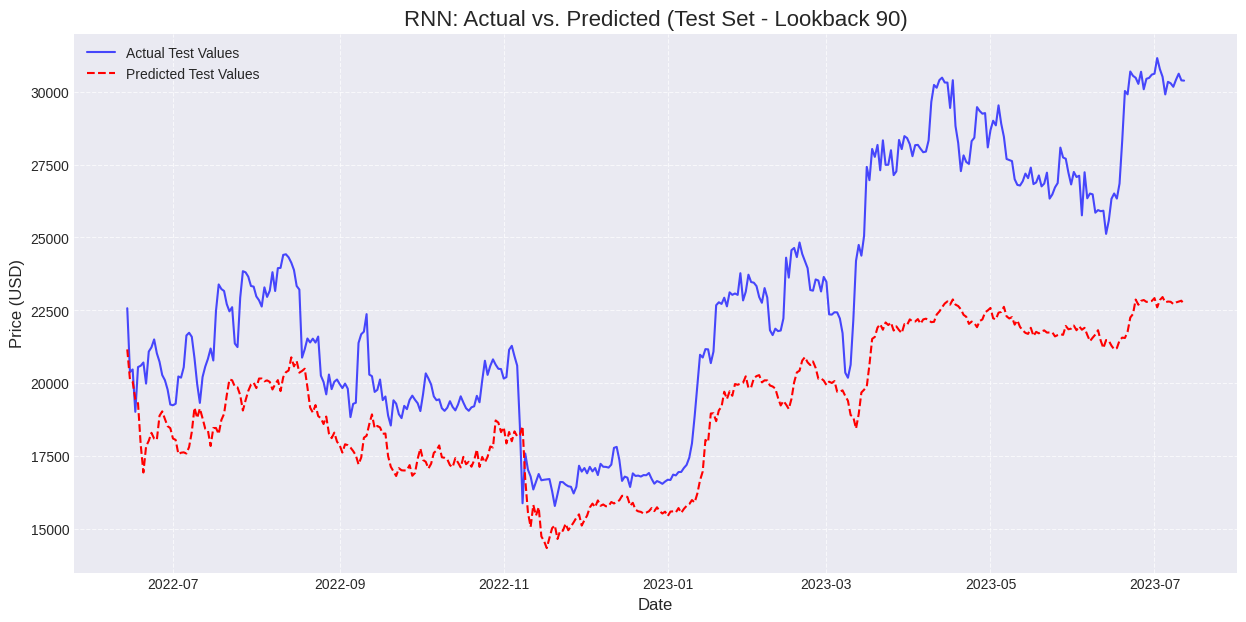

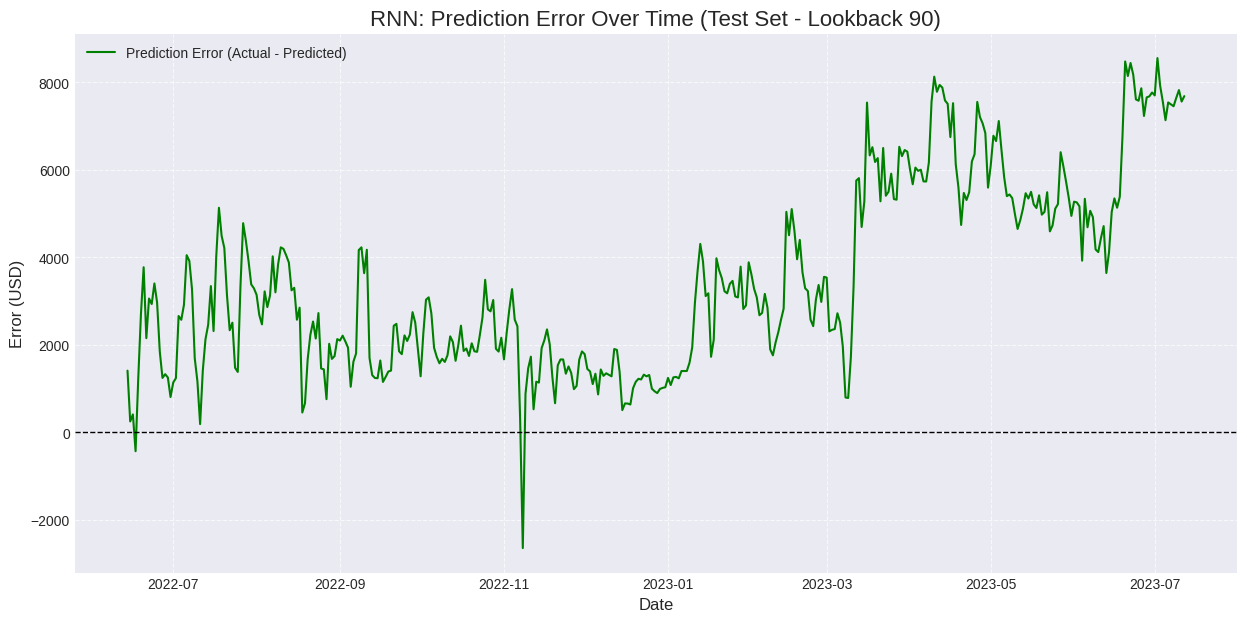


End of RNN Loop


Lookback periods to try: [30, 60, 90]


In [ ]:
lookback_periods = [30, 60, 90]
results = {}

EPOCHS = 50
BATCH_SIZE = 32
PATIENCE = 10

for lookback in lookback_periods:
    print(f"\n===== Training and Evaluating RNN for Lookback Period: {lookback} days =====\n")

    X_train, y_train = create_sequences(scaled_train_features, scaled_train_target.ravel(), lookback)
    X_val, y_val = create_sequences(scaled_val_features, scaled_val_target.ravel(), lookback)
    X_test, y_test = create_sequences(scaled_test_features, scaled_test_target.ravel(), lookback)

    y_train_original_for_plotting = original_train_target_for_plotting[lookback:]
    y_test_original_for_eval = original_test_target[lookback:]

    train_plot_dates = train_dates[lookback:len(X_train) + lookback]
    test_plot_dates = test_dates[lookback:len(X_test) + lookback]


    if X_train.shape[0] == 0 or X_val.shape[0] == 0 or X_test.shape[0] == 0:
        print(f"Not enough data to create sequences for lookback {lookback}. Skipping.")
        continue

    print(f"Shapes for lookback {lookback}:")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
    print(f"y_test_original_for_eval shape: {y_test_original_for_eval.shape}")


    rnn_model = create_rnn_model(lookback, num_features, rnn_units=50, dropout_rate=0.2)
    print(f"\nRNN Model Summary (lookback={lookback}):")
    rnn_model.summary()

    early_stopping = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    print(f"\nTraining RNN model for lookback {lookback}...")
    history = rnn_model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'RNN Training and Validation Loss (Lookback {lookback})', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss (MSE)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print(f"\nEvaluating RNN model on Test Set (lookback {lookback})...")

    y_pred_scaled_train = rnn_model.predict(X_train)
    y_pred_scaled_test = rnn_model.predict(X_test)

    y_pred_train = target_scaler.inverse_transform(y_pred_scaled_train)
    y_pred_test = target_scaler.inverse_transform(y_pred_scaled_test)

    y_true_train_original = y_train_original_for_plotting
    y_true_test_original = y_test_original_for_eval

    y_true_train_original = y_true_train_original[:len(y_pred_train)]
    y_true_test_original = y_true_test_original[:len(y_pred_test)]


    mse_test = mean_squared_error(y_true_test_original, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_true_test_original, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_true_test_original, y_pred_test) * 100
    ce_test = np.sum(y_true_test_original - y_pred_test)


    print(f"\nTest Set Metrics for RNN (Lookback {lookback}):")
    print(f"  Mean Squared Error (MSE):      {mse_test:.4f}")
    print(f"  Root Mean Squared Error (RMSE):{rmse_test:.4f}")
    print(f"  Mean Absolute Error (MAE):     {mae_test:.4f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
    print(f"  Cumulative Error (CE):         {ce_test:.4f}")

    results[lookback] = {
        'MSE': mse_test, 'RMSE': rmse_test, 'MAE': mae_test,
        'MAPE': mape_test, 'CE': ce_test, 'model': rnn_model,
        'history': history,
        'y_pred_train': y_pred_train, 'y_true_train_original': y_true_train_original,
        'y_pred_test': y_pred_test, 'y_true_test_original': y_true_test_original,
        'train_plot_dates': train_plot_dates[:len(y_pred_train)],
        'test_plot_dates': test_plot_dates[:len(y_pred_test)]
    }


    plt.figure(figsize=(15, 7))
    plt.plot(results[lookback]['train_plot_dates'], results[lookback]['y_true_train_original'], label='Actual Train Values', color='blue', alpha=0.7)
    plt.plot(results[lookback]['train_plot_dates'], results[lookback]['y_pred_train'], label='Predicted Train Values', color='red', linestyle='--')
    plt.title(f'RNN: Actual vs. Predicted (Training Set - Lookback {lookback})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(15, 7))
    plt.plot(results[lookback]['test_plot_dates'], results[lookback]['y_true_test_original'], label='Actual Test Values', color='blue', alpha=0.7)
    plt.plot(results[lookback]['test_plot_dates'], results[lookback]['y_pred_test'], label='Predicted Test Values', color='red', linestyle='--')
    plt.title(f'RNN: Actual vs. Predicted (Test Set - Lookback {lookback})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


    error_test = results[lookback]['y_true_test_original'] - results[lookback]['y_pred_test']
    plt.figure(figsize=(15, 7))
    plt.plot(results[lookback]['test_plot_dates'], error_test, label='Prediction Error (Actual - Predicted)', color='green')
    plt.axhline(0, color='black', linestyle='--', lw=1)
    plt.title(f'RNN: Prediction Error Over Time (Test Set - Lookback {lookback})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Error (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("\n" + "==="*20 + "\nEnd of RNN Loop\n" + "==="*20 + "\n")
lookback_periods_to_try = [30, 60, 90]

print(f"\nLookback periods to try: {lookback_periods_to_try}")

In [103]:
results_df = pd.DataFrame(results).T
results_df_display = results_df[['MSE', 'RMSE', 'MAE', 'MAPE', 'CE']]
print(results_df_display.sort_values(by='RMSE'))

if results:
    best_lookback_rnn = min(results, key=lambda k: results[k]['RMSE'])
    print(f"\\nBest Lookback Period for RNN based on RMSE: {best_lookback_rnn} days")
    best_rnn_model_info = results[best_lookback_rnn]
else:
    print("\\nNo RNN models were successfully trained to determine the best lookback.")
    best_lookback_rnn = 60
    best_rnn_model_info = None



                MSE         RMSE          MAE       MAPE              CE
90  16563544.516399  4069.833475  3482.330842  14.266344  1365901.755879
60  24631186.986804  4962.981663  4151.929713  16.365219  1754786.049826
30  42830022.859281  6544.465055  5529.394854  21.156291  2506895.171899
\nBest Lookback Period for RNN based on RMSE: 90 days


In [ ]:
def create_lstm_model(lookback, num_features, lstm_units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True,
                   input_shape=(lookback, num_features)))
    model.add(Dropout(dropout_rate))

    model.add(LSTM(units=lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))

    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


===== Training and Evaluating LSTM for Lookback Period: 60 days =====

Shapes for LSTM (lookback 60):
X_train_lstm: (2194, 60, 5), y_train_lstm: (2194,)
X_val_lstm: (423, 60, 5), y_val_lstm: (423,)
X_test_lstm: (424, 60, 5), y_test_lstm: (424,)

LSTM Model Summary (lookback=60):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model (lookback 60)...
Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0227 - val_loss: 1.7739
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0026 - val_loss: 1.2393
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - val_loss: 1.0086
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.8440
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0021 - val_loss: 0.6776
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0019 - val_loss: 0.5936
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 0.5314
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.4117
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0016 - val_loss: 0.3448
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.3289
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 0.2567
Epoch 12/50
69/69 ━━━━━━━

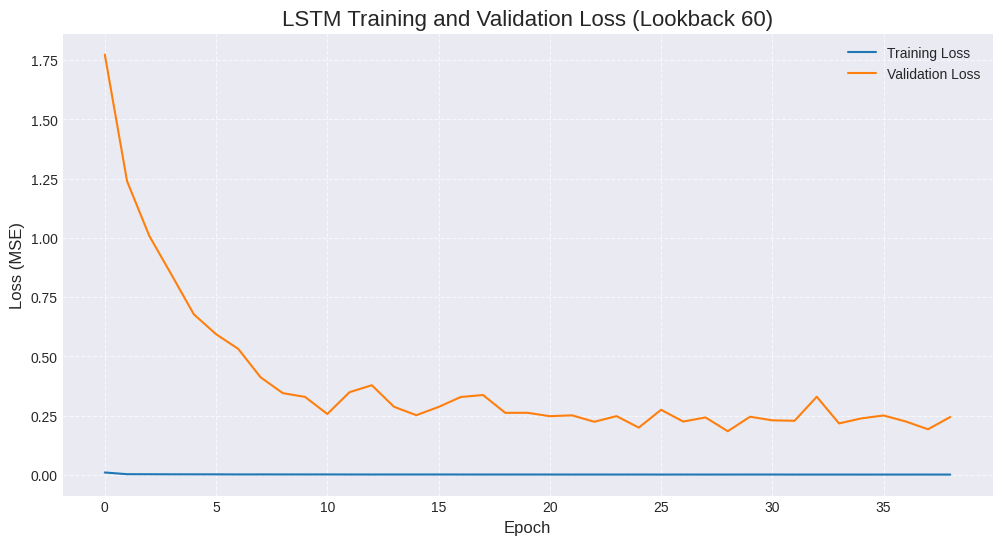


Evaluating LSTM model on Test Set (lookback 60)...
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Test Set Metrics for LSTM (Lookback 60):
  Mean Squared Error (MSE):      2292194.3271
  Root Mean Squared Error (RMSE):1513.9994
  Mean Absolute Error (MAE):     1163.5533
  Mean Absolute Percentage Error (MAPE): 4.75%
  Cumulative Error (CE):         378223.1270


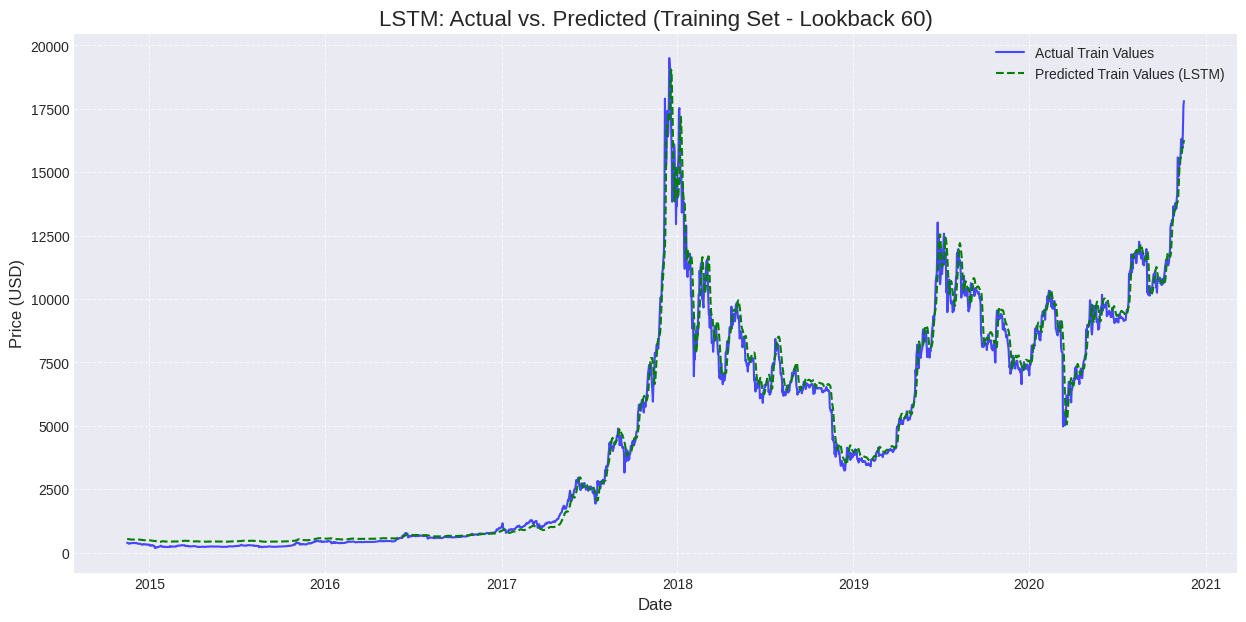

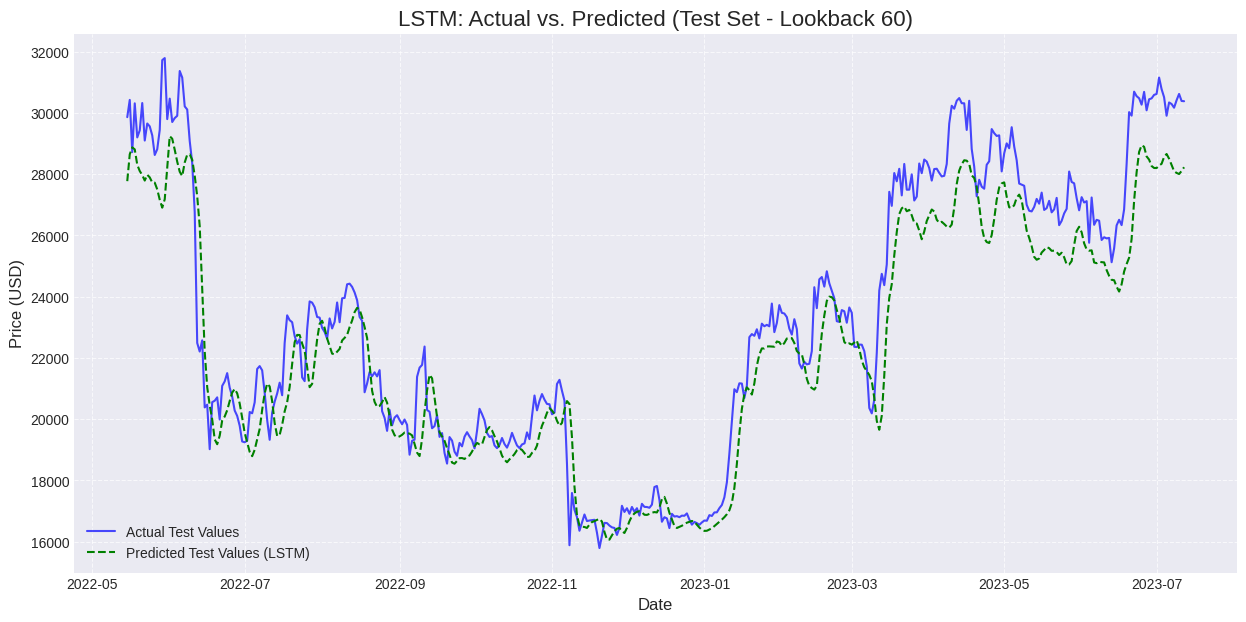

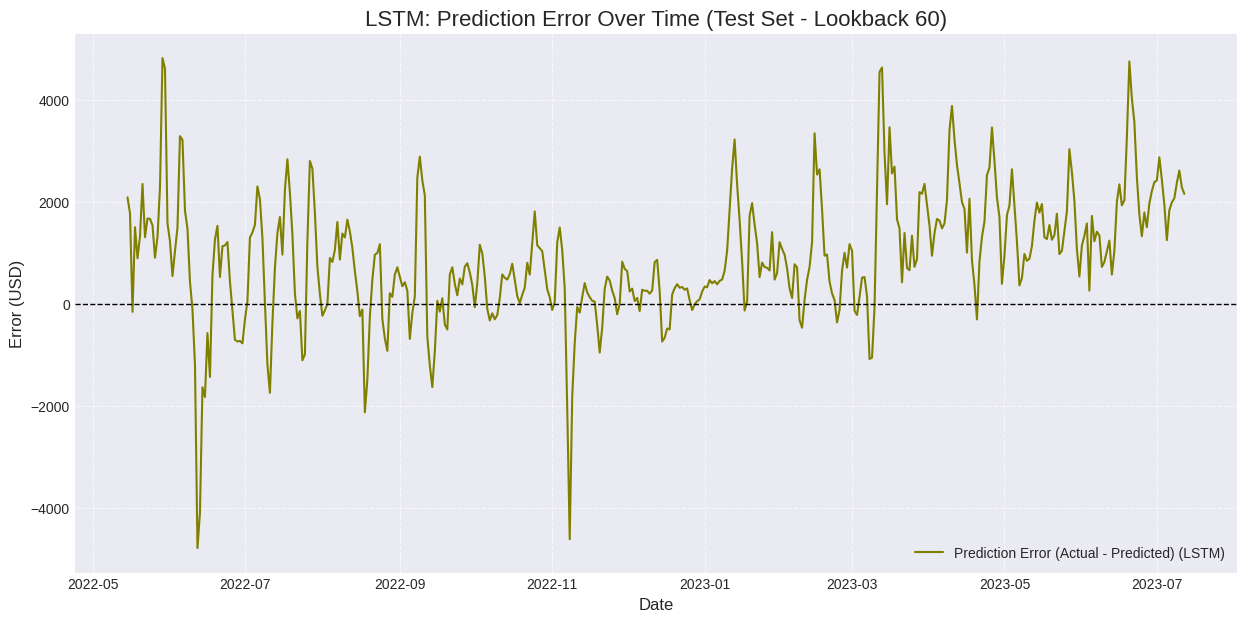

In [ ]:
if not results:
    print("RNN training did not yield results, using default lookback of 60 for LSTM.")
    current_lookback_lstm = 60
else:
    current_lookback_lstm = best_lookback_rnn

print(f"\n===== Training and Evaluating LSTM for Lookback Period: {current_lookback_lstm} days =====\n")

X_train_lstm, y_train_lstm = create_sequences(scaled_train_features, scaled_train_target.ravel(), current_lookback_lstm)
X_val_lstm, y_val_lstm = create_sequences(scaled_val_features, scaled_val_target.ravel(), current_lookback_lstm)
X_test_lstm, y_test_lstm = create_sequences(scaled_test_features, scaled_test_target.ravel(), current_lookback_lstm)

y_train_original_lstm_plotting = original_train_target_for_plotting[current_lookback_lstm : current_lookback_lstm + len(X_train_lstm)]
y_test_original_lstm_eval = original_test_target[current_lookback_lstm : current_lookback_lstm + len(X_test_lstm)]


train_plot_dates_lstm = train_dates[current_lookback_lstm : current_lookback_lstm + len(X_train_lstm)]
test_plot_dates_lstm = test_dates[current_lookback_lstm : current_lookback_lstm + len(X_test_lstm)]


lstm_model_results = {}

if X_train_lstm.shape[0] == 0 or X_val_lstm.shape[0] == 0 or X_test_lstm.shape[0] == 0:
    print(f"Not enough data to create sequences for LSTM with lookback {current_lookback_lstm}. Skipping LSTM.")
else:
    print(f"Shapes for LSTM (lookback {current_lookback_lstm}):")
    print(f"X_train_lstm: {X_train_lstm.shape}, y_train_lstm: {y_train_lstm.shape}")
    print(f"X_val_lstm: {X_val_lstm.shape}, y_val_lstm: {y_val_lstm.shape}")
    print(f"X_test_lstm: {X_test_lstm.shape}, y_test_lstm: {y_test_lstm.shape}")

    lstm_model = create_lstm_model(current_lookback_lstm, num_features, lstm_units=50, dropout_rate=0.2)
    print(f"\nLSTM Model Summary (lookback={current_lookback_lstm}):")
    lstm_model.summary()

    early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)

    print(f"\nTraining LSTM model (lookback {current_lookback_lstm})...")
    history_lstm = lstm_model.fit(
        X_train_lstm, y_train_lstm,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(X_val_lstm, y_val_lstm),
        callbacks=[early_stopping_lstm],
        verbose=1
    )

    plt.figure(figsize=(12, 6))
    plt.plot(history_lstm.history['loss'], label='Training Loss')
    plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
    plt.title(f'LSTM Training and Validation Loss (Lookback {current_lookback_lstm})', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss (MSE)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    print(f"\nEvaluating LSTM model on Test Set (lookback {current_lookback_lstm})...")
    y_pred_scaled_train_lstm = lstm_model.predict(X_train_lstm)
    y_pred_scaled_test_lstm = lstm_model.predict(X_test_lstm)

    y_pred_train_lstm = target_scaler.inverse_transform(y_pred_scaled_train_lstm)
    y_pred_test_lstm = target_scaler.inverse_transform(y_pred_scaled_test_lstm)

    y_true_train_original_lstm = y_train_original_lstm_plotting
    y_true_test_original_lstm = y_test_original_lstm_eval

    y_true_train_original_lstm = y_true_train_original_lstm[:len(y_pred_train_lstm)]
    y_true_test_original_lstm = y_true_test_original_lstm[:len(y_pred_test_lstm)]


    mse_test_lstm = mean_squared_error(y_true_test_original_lstm, y_pred_test_lstm)
    rmse_test_lstm = np.sqrt(mse_test_lstm)
    mae_test_lstm = mean_absolute_error(y_true_test_original_lstm, y_pred_test_lstm)
    mape_test_lstm = mean_absolute_percentage_error(y_true_test_original_lstm, y_pred_test_lstm) * 100
    ce_test_lstm = np.sum(y_true_test_original_lstm - y_pred_test_lstm)

    print(f"\nTest Set Metrics for LSTM (Lookback {current_lookback_lstm}):")
    print(f"  Mean Squared Error (MSE):      {mse_test_lstm:.4f}")
    print(f"  Root Mean Squared Error (RMSE):{rmse_test_lstm:.4f}")
    print(f"  Mean Absolute Error (MAE):     {mae_test_lstm:.4f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_test_lstm:.2f}%")
    print(f"  Cumulative Error (CE):         {ce_test_lstm:.4f}")

    lstm_model_results = {
        'MSE': mse_test_lstm, 'RMSE': rmse_test_lstm, 'MAE': mae_test_lstm,
        'MAPE': mape_test_lstm, 'CE': ce_test_lstm, 'model': lstm_model,
        'history': history_lstm,
        'y_pred_train': y_pred_train_lstm, 'y_true_train_original': y_true_train_original_lstm,
        'y_pred_test': y_pred_test_lstm, 'y_true_test_original': y_true_test_original_lstm,
        'train_plot_dates': train_plot_dates_lstm[:len(y_pred_train_lstm)],
        'test_plot_dates': test_plot_dates_lstm[:len(y_pred_test_lstm)]
    }


    plt.figure(figsize=(15, 7))
    plt.plot(lstm_model_results['train_plot_dates'], lstm_model_results['y_true_train_original'], label='Actual Train Values', color='blue', alpha=0.7)
    plt.plot(lstm_model_results['train_plot_dates'], lstm_model_results['y_pred_train'], label='Predicted Train Values (LSTM)', color='green', linestyle='--')
    plt.title(f'LSTM: Actual vs. Predicted (Training Set - Lookback {current_lookback_lstm})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    plt.figure(figsize=(15, 7))
    plt.plot(lstm_model_results['test_plot_dates'], lstm_model_results['y_true_test_original'], label='Actual Test Values', color='blue', alpha=0.7)
    plt.plot(lstm_model_results['test_plot_dates'], lstm_model_results['y_pred_test'], label='Predicted Test Values (LSTM)', color='green', linestyle='--')
    plt.title(f'LSTM: Actual vs. Predicted (Test Set - Lookback {current_lookback_lstm})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    error_test_lstm = lstm_model_results['y_true_test_original'] - lstm_model_results['y_pred_test']
    plt.figure(figsize=(15, 7))
    plt.plot(lstm_model_results['test_plot_dates'], error_test_lstm, label='Prediction Error (Actual - Predicted) (LSTM)', color='olive')
    plt.axhline(0, color='black', linestyle='--', lw=1)
    plt.title(f'LSTM: Prediction Error Over Time (Test Set - Lookback {current_lookback_lstm})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Error (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [ ]:

print("\n" + "==="*20 + "\nEnd of RNN Loop\n" + "==="*20 + "\n")

print("\n===== Summary of RNN Performance Across Lookback Periods =====")
if results:
    results_df = pd.DataFrame(results).T
    if not results_df.empty and all(col in results_df.columns for col in ['MSE', 'RMSE', 'MAE', 'MAPE', 'CE']):
        results_df_display = results_df[['MSE', 'RMSE', 'MAE', 'MAPE', 'CE']]
        print(results_df_display.sort_values(by='RMSE'))
    else:
        print("RNN results dictionary is populated but may lack expected metric columns for display.")
else:
    print("No results to display from RNN training (results dictionary is empty).")

best_lookback_rnn = None
best_rnn_model_info = None

if results:
    try:
        best_lookback_rnn = min(results, key=lambda k: results[k]['RMSE'])
        best_rnn_model_info = results[best_lookback_rnn]
        print(f"\nBest Lookback Period for RNN (based on RMSE): {best_lookback_rnn} days.")
        print(f"  Best RNN RMSE: {best_rnn_model_info['RMSE']:.4f}, MAE: {best_rnn_model_info['MAE']:.4f}")
    except KeyError as e:
        print(f"Error accessing RMSE in results: {e}. Cannot determine best RNN model.")
        best_lookback_rnn = noncentral_chisquare
        best_rnn_model_info = None
    except ValueError as e:
        print(f"Error: The 'results' dictionary might be empty or structured unexpectedly: {e}")
        best_lookback_rnn = None
        best_rnn_model_info = None
else:
    print("\nNo RNN models were successfully trained or results dictionary is empty.")
    print("Cannot determine the best RNN model. 'best_rnn_model_info' will be None.")




End of RNN Loop


===== Summary of RNN Performance Across Lookback Periods =====
                MSE         RMSE          MAE       MAPE              CE
90  16563544.516399  4069.833475  3482.330842  14.266344  1365901.755879
60  24631186.986804  4962.981663  4151.929713  16.365219  1754786.049826
30  42830022.859281  6544.465055  5529.394854  21.156291  2506895.171899

Best Lookback Period for RNN (based on RMSE): 90 days.
  Best RNN RMSE: 4069.8335, MAE: 3482.3308



===== Comparison: Best RNN vs LSTM =====
Best RNN Model (Lookback 90):
  RMSE: 4069.8335, MAE: 3482.3308, MAPE: 14.27%

LSTM Model (Lookback 90):
  RMSE: 1513.9994, MAE: 1163.5533, MAPE: 4.75%

--- Visual Comparison on Test Set ---


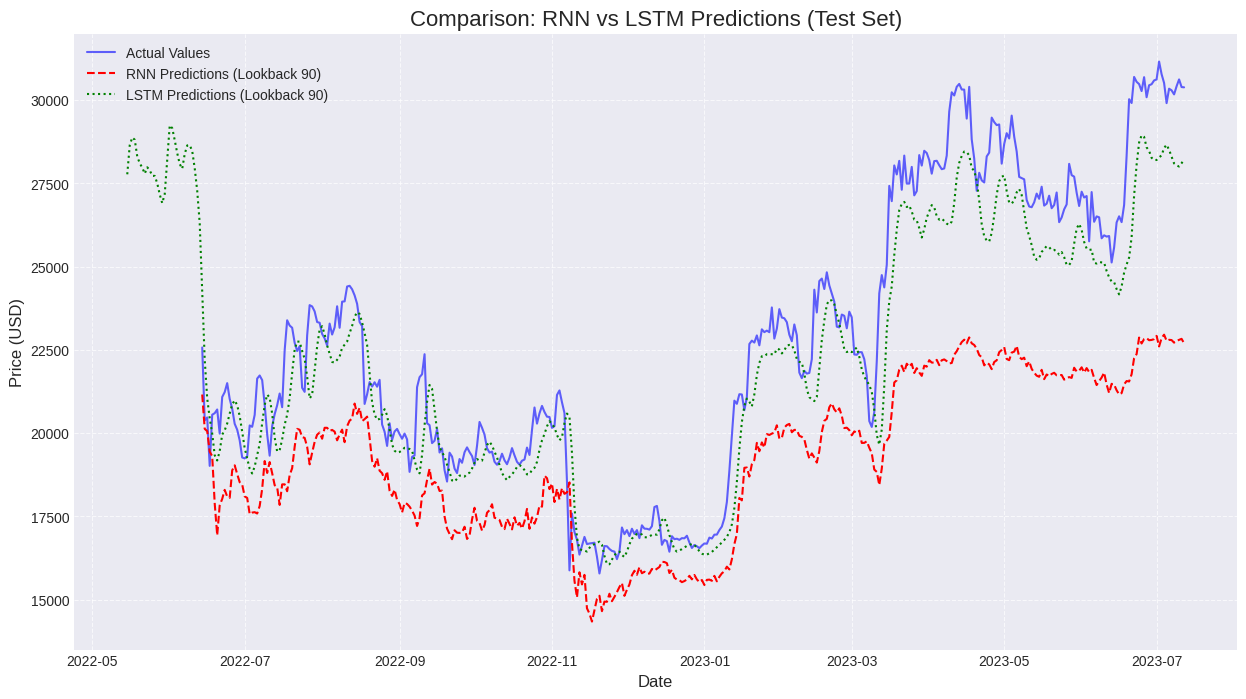

In [ ]:
print("\n===== Comparison: Best RNN vs LSTM =====")

if best_rnn_model_info and lstm_model_results:
    print(f"Best RNN Model (Lookback {best_lookback_rnn}):")
    print(f"  RMSE: {best_rnn_model_info['RMSE']:.4f}, MAE: {best_rnn_model_info['MAE']:.4f}, MAPE: {best_rnn_model_info['MAPE']:.2f}%")

    print(f"\nLSTM Model (Lookback {current_lookback_lstm}):")
    print(f"  RMSE: {lstm_model_results['RMSE']:.4f}, MAE: {lstm_model_results['MAE']:.4f}, MAPE: {lstm_model_results['MAPE']:.2f}%")

    print("\n--- Visual Comparison on Test Set ---")
    plt.figure(figsize=(15, 8))
    plt.plot(best_rnn_model_info['test_plot_dates'], best_rnn_model_info['y_true_test_original'], label='Actual Values', color='blue', alpha=0.6)
    plt.plot(best_rnn_model_info['test_plot_dates'], best_rnn_model_info['y_pred_test'], label=f'RNN Predictions (Lookback {best_lookback_rnn})', color='red', linestyle='--')

    if 'test_plot_dates' in lstm_model_results and current_lookback_lstm == best_lookback_rnn :
         plt.plot(lstm_model_results['test_plot_dates'], lstm_model_results['y_pred_test'], label=f'LSTM Predictions (Lookback {current_lookback_lstm})', color='green', linestyle=':')
    elif 'test_plot_dates' in lstm_model_results:
         plt.plot(lstm_model_results['test_plot_dates'], lstm_model_results['y_pred_test'], label=f'LSTM Predictions (Lookback {current_lookback_lstm} - different)', color='green', linestyle=':')

    plt.title('Comparison: RNN vs LSTM Predictions (Test Set)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

else:
    print("Could not perform RNN vs LSTM comparison. Required model information is missing or incomplete.")
    if not best_rnn_model_info:
        print("Reason: Best RNN model information is not available.")
    if not lstm_model_results:
        print("Reason: LSTM model results are not available.")

## Bonus Questions

**1. Under what conditions is MLP equivalent to Logistic Regression?**

A Multilayer Perceptron (MLP) is equivalent to Logistic Regression under the following specific conditions:

- **No Hidden Layers:** The MLP must be a single-layer perceptron, meaning it only has an input layer and an output layer, with no hidden layers in between.
- **Single Output Neuron:** The output layer must contain exactly one neuron. This is because logistic regression is typically used for binary classification (or predicts a single probability).
- **Sigmoid Activation Function:** The activation function used in the single output neuron must be the **sigmoid function** (also known as the logistic function). The sigmoid function squashes its input into the range (0, 1), which is interpreted as a probability in logistic regression.
- **Binary Cross-Entropy Loss:** The model must be trained using a **binary cross-entropy** loss function (also called log loss). This is the standard loss function for logistic regression, measuring the difference between the predicted probabilities and the actual binary outcomes.

Essentially, logistic regression can be seen as a very simple neural network.

**2. Suppose you have a CNN that begins by taking an input image of size 28 × 28 × 3 and passing through a convolution layer that convolves the image using 3 filters of dimensions 2 × 2 × 3 with valid padding.**

- Input image dimensions: $H_{in} = 28$, $W_{in} = 28$, $C_{in} = 3$ (e.g., RGB)
- Number of filters: $K = 3$
- Filter dimensions: $F_h = 2$, $F_w = 2$, $F_c = 3$ (Filter depth $F_c$ must match input channels $C_{in}$)
- Padding: 'valid' (meaning no padding)

**A. How many learnable parameters does this convolution layer have?**

The number of learnable parameters in a convolutional layer consists of weights and biases.

- **Weights per filter:** Each filter has dimensions $F_h \times F_w \times F_c$. So, the number of weights per filter is $2 \times 2 \times 3 = 12$.
- **Bias per filter:** Each filter has 1 bias term.
- **Total parameters per filter:** Weights + Bias = $12 + 1 = 13$.
- **Total learnable parameters for the layer:** Since there are $K=3$ filters, the total number of parameters is $3 \times (\text{parameters per filter}) = 3 \times 13 = \textbf{39}$.

So, the convolution layer has **39 learnable parameters**.

**B. Suppose that you instead decided to use a fully connected layer to replicate the behavior of this convolutional layer. How many parameters would that fully connected layer have?**

To "replicate the behavior" is a bit ambiguous. A fully connected (FC) layer does not inherently perform convolution or share weights.
If the question means: what if we wanted an FC layer that takes the same input and produces an output of the same dimensions as the convolutional layer, the interpretation is as follows:

1. **Output dimensions of the convolutional layer:**
    - With 'valid' padding:
        - Output Height $H_{out} = (H_{in} - F_h) / S + 1 = (28 - 2) / 1 + 1 = 26 + 1 = 27$ (Assuming stride $S=1$)
        - Output Width $W_{out} = (W_{in} - F_w) / S + 1 = (28 - 2) / 1 + 1 = 26 + 1 = 27$ (Assuming stride $S=1$)
        - Output Channels $C_{out} = K = 3$ (number of filters)
    - So, the output volume of the conv layer is $27 \times 27 \times 3$. The number of neurons in this output volume is $27 \times 27 \times 3 = 729 \times 3 = 2187$.
2. **Parameters for an FC layer:**
    - The input to the FC layer would be the flattened original image: $28 \times 28 \times 3 = 2352$ input neurons.
    - The FC layer would need to produce $2187$ output neurons (to match the flattened output of the conv layer).
    - Number of weights = (Number of input neurons) $\times$ (Number of output neurons)
    $= (28 \times 28 \times 3) \times (27 \times 27 \times 3)$
    $= 2352 \times 2187 = 5,144,184$.
    - Number of biases = Number of output neurons = $2187$.
    - Total parameters for the FC layer = $5,144,184 + 2187 = \textbf{5,146,371}$.

This highlights the massive parameter efficiency of convolutional layers (39 parameters) compared to fully connected layers (over 5 million parameters) for processing spatial data, primarily due to **weight sharing** and **local connectivity** in CNNs.

*Self-correction on output dimension calculation for 'valid' padding*:
$H_{out} = \lfloor (H_{in} - F_h + 2P) / S \rfloor + 1$. With valid padding, $P=0$.
$H_{out} = \lfloor (28 - 2 + 0) / 1 \rfloor + 1 = 26 + 1 = 27$. Correct.

**3. Explain mathematically the vanishing gradient problem in Recurrent Neural Networks (RNNs). Then, analyze how changing the lookback window size impacts the severity of this phenomenon.**

**Mathematical Explanation of Vanishing Gradients in RNNs:**

In an RNN, the hidden state $h_t$ at time step $t$ is computed based on the previous hidden state $h_{t-1}$ and the current input $x_t$:
$h_t = f(W_{hh} h_{t-1} + W_{xh} x_t + b_h)$
where $f$ is an activation function (e.g., tanh or sigmoid), $W_{hh}$ are the recurrent weights, $W_{xh}$ are the input weights, and $b_h$ is the bias.

The loss $L$ is typically calculated at the final time step $T$ (or summed over all time steps). To update the weights (e.g., $W_{hh}$), we need to compute the gradient $\frac{\partial L}{\partial W_{hh}}$. This involves the chain rule, propagating gradients backward through time.

Consider the gradient of the loss $L$ with respect to a hidden state $h_k$ at some earlier time step $k < T$:
$\frac{\partial L}{\partial h_k} = \frac{\partial L}{\partial h_T} \frac{\partial h_T}{\partial h_{T-1}} \frac{\partial h_{T-1}}{\partial h_{T-2}} \dots \frac{\partial h_{k+1}}{\partial h_k}$

The Jacobian $\frac{\partial h_t}{\partial h_{t-1}}$ is crucial here:
$\frac{\partial h_t}{\partial h_{t-1}} = \text{diag}(f'(W_{hh}h_{t-1} + W_{xh}x_t + b_h)) W_{hh}^T$
Let's denote $f'(net_t)$ as $f'*t$.
So, $\frac{\partial h_t}{\partial h*{t-1}} \approx W_{hh}^T \text{diag}(f'_t)$.

The gradient $\frac{\partial L}{\partial h_k}$ can be written as:
$\frac{\partial L}{\partial h_k} = \frac{\partial L}{\partial h_T} \prod_{j=k+1}^{T} \frac{\partial h_j}{\partial h_{j-1}} = \frac{\partial L}{\partial h_T} \prod_{j=k+1}^{T} (W_{hh}^T \text{diag}(f'_j))$

The **vanishing gradient problem** occurs when the terms in this product, specifically the magnitudes (e.g., spectral radius or singular values) of $W_{hh}^T \text{diag}(f'*j)$, are consistently less than 1.
If $\left\| W*{hh}^T \text{diag}(f'*j) \right\| < 1$, then as the number of terms in the product ($T-k$, which is the temporal distance) increases, the product $\prod*{j=k+1}^{T} (W_{hh}^T \text{diag}(f'*j))$ will exponentially shrink towards zero.
This means that $\frac{\partial L}{\partial h_k}$ becomes very small for distant past states $h_k$. Consequently, the gradients of the loss with respect to the weights $W*{hh}$ (and $W_{xh}$) that were influential at these early time steps also become tiny.
When gradients are vanishingly small, the weight updates for these earlier time steps are negligible, and the RNN fails to learn long-range dependencies. The model effectively "forgets" information from the distant past.

This is particularly problematic with activation functions like sigmoid or tanh, whose derivatives are small (e.g., $f'(x) \in (0, 0.25]$ for sigmoid, $f'(x) \in (0, 1]$ for tanh) especially in their saturating regions.

Conversely, if $\left\| W_{hh}^T \text{diag}(f'_j) \right\| > 1$ consistently, the product can grow exponentially, leading to the **exploding gradient problem**.

**Impact of Changing the Lookback Window Size on Vanishing Gradients:**

The "lookback window" (or sequence length) determines how many previous time steps the RNN considers for making a prediction, effectively setting the maximum length $T-k$ over which gradients need to propagate during training for a single sequence.

- **Shorter Lookback Window:**
    - **Severity Reduction:** A shorter lookback window reduces the maximum length of the product of Jacobians. With fewer terms in the product $\prod_{j=k+1}^{T} (W_{hh}^T \text{diag}(f'_j))$, there's less opportunity for the gradient signal to diminish exponentially. This can *mitigate* the severity of the vanishing gradient problem.
    - **Learning Focus:** The model is trained to focus on shorter-term dependencies. Gradients related to these more recent events are less likely to vanish.
    - **Limitation:** While it helps with the numerical stability of gradients for the given window, it inherently prevents the model from learning dependencies that span longer than this chosen window. If true long-range dependencies exist in the data beyond the lookback, the model won't capture them.
- **Longer Lookback Window:**
    - **Increased Severity:** A longer lookback window increases the number of time steps over which gradients must propagate. This makes the RNN more susceptible to the vanishing gradient problem (and also exploding gradients). The product of Jacobians has more terms, increasing the likelihood of the overall product becoming extremely small (or large).
    - **Potential for Long-Range Learning:** If the vanishing gradient problem can be managed (e.g., through LSTMs, GRUs, careful initialization, gradient clipping), a longer lookback window provides the *opportunity* for the model to learn longer-term dependencies present in the data.
    - **Training Difficulty:** Training can become more difficult and unstable due to the increased risk of vanishing/exploding gradients. Even if LSTMs are used, extremely long sequences can still pose challenges.

**In summary:**
A **shorter lookback window** makes the RNN less prone to severe vanishing gradients by limiting the propagation depth but restricts its ability to learn long-range patterns.
A **longer lookback window** offers the potential to learn more extended temporal dependencies but exacerbates the vanishing gradient problem, making specialized architectures like LSTMs or GRUs essential for effective training. The choice of lookback window size is therefore a critical hyperparameter that involves a trade-off between computational stability/focus and the capacity to model long-term effects.

---